In [4]:
# source("http://www.bioconductor.org/biocLite.R")
# options(BioC_mirror="http://mirrors.ustc.edu.cn/bioc/")
# biocLite("pathifier")

# load the library

In [5]:
library(pathifier)

# Load the data set
   
   Load the data set ‘Sheffer’ (built in Pathifier package) 

In [6]:
data(Sheffer)

In [12]:
str(sheffer)

List of 6
 $ data    : num [1:5000, 1:50] 7.41 10.86 7.17 11.82 11.21 ...
 $ samples :List of 50
  ..$ NA: chr [1, 1] "00300_B_25/02/2004_71_F_WN_2_0_0_0_NED_92 _X_92 _L_G_W_O_GG_O_O_2_R_4.5 _N2_X_0 _21_2_Y_B_0"
  ..$ NA: chr [1, 1] "00450_U_13/02/2004_72_M_WN_3_1_0_4_DOD_110_Y_6  _S_B_M_M_TG_M_O_9_L_4.5 _XX_2_3 _19_1_Y_O_0"
  ..$ NA: chr [1, 1] "00464_U_2/7/2003  _57_M_WN_2_0_0_4_DOD_41 _Y_18 _O_B_M_W_TT_M_O_8_L_5   _XX_2_0 _6 _0_Y_O_0"
  ..$ NA: chr [1, 1] "00485_U_13/02/2004_63_F_WN_2_1_0_4_DOD_80 _Y_19 _S_B_W_M_TT_M_O_8_L_4.8 _XX_2_2 _8 _1_Y_O_0"
  ..$ NA: chr [1, 1] "00620_A_3/7/2003  _70_F_WN_3_1_1_4_DOD_5  _O_5  _H_B_W_O_TT_O_X_2_R_3   _D3_2_3 _18_1_Y_O_0"
  ..$ NA: chr [1, 1] "00838_U_13/02/2004_43_F_XX_3_0_1_4_NED_145_Y_50 _O_?_W_M_TG_O_O_8_L_6   _XX_2_0 _7 _0_Y_O_0"
  ..$ NA: chr [1, 1] "00852_U_2/7/2003  _64_M_WN_2_2_1_4_DOD_38 _Y_26 _S_B_M_W_O _O_O_1_R_3.2 _XX_2_9 _15_1_Y_O_0"
  ..$ NA: chr [1, 1] "00888_B_2/7/2003  _69_M_WN_3_0_0_0_DUN_46 _X_46 _S_?_W_W_TT_M_O_9_L_4   _XX_

# Load pathway database
 
   Load the two pathways (MISMATCH REPAIR and REGULATION OF AUTOPHAGY) by "KEGG"(supplied with the package)

In [7]:
data(KEGG)

In [8]:
kegg$pathwaynames = list('MISMATCH_REPAIR' = 'MISMATCH_REPAIR', 'REGULATION_OF_AUTOPHAGY' = 'REGULATION_OF_AUTOPHAGY')

In [10]:
str(kegg)

List of 2
 $ gs          :List of 2
  ..$ NA: chr [1:23, 1] "EXO1 " "LIG1 " "MLH1 " "MLH3 " ...
  ..$ NA: chr [1:35, 1] "ATG12    " "ATG3     " "ATG4A    " "ATG4B    " ...
 $ pathwaynames:List of 2
  ..$ MISMATCH_REPAIR        : chr "MISMATCH_REPAIR"
  ..$ REGULATION_OF_AUTOPHAGY: chr "REGULATION_OF_AUTOPHAGY"
 - attr(*, "header")=List of 3
  ..$ description: chr "MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 16 12:18:11 2011                                                "
  ..$ version    : chr "5"
  ..$ endian     : chr "little"


# Quantify deregulation of pathways

 Calculate the deregulation score by running pathifier

In [11]:
PDS = quantify_pathways_deregulation(sheffer$data, sheffer$allgenes,
                                     kegg$gs, kegg$pathwaynames, sheffer$normals, attempts = 100,
                                     min_exp = sheffer$minexp, min_std = sheffer$minstd)

robust_score_bydist. min_exp= 4 , min_std= 0.2254005 
pathway  1 > sig: 0.08207359 
pathway  2 > sig: 0.101404 
2 pathways processed with start= by ranks 


The deregulation scores are now in PDS$scores, ready for further analysis

In [13]:
PDS$scores

0.2603208,0.3061716,0.6829143,0.3061716,0.4265159,0.3061716,0.2539607,0.4980156,0.3657497,0.4640441,...,0.003497064,0.6646091,0.07425438,0.7616032,0.727066,0.6539969,0.5418885,0.6495307,0.06834126,0.367718
0.1024061,0.4521433,0.613428,0.8583417,0.6967684,0.4783103,0.6617971,0.8041276,1,0.5308368,...,0.3829402,0.2915813,0.3003202,0.3213415,0.8028843,0.4345198,0.4926453,0.5480933,0.2740998,0.8015292


# Brief analysis
Show scores for normals samples are genereally lower

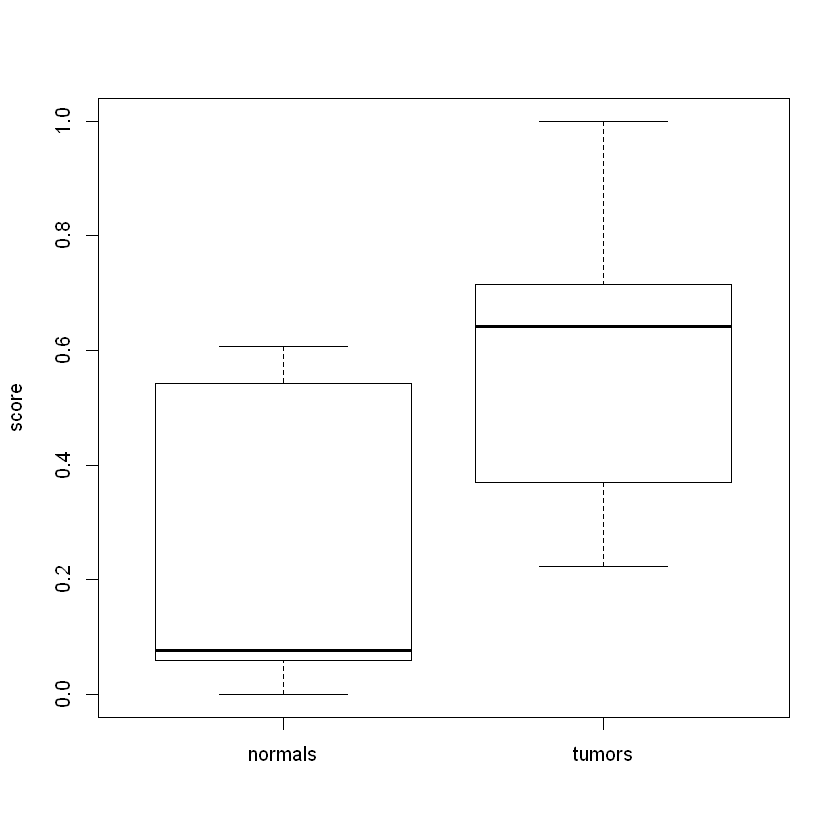

In [14]:
x = NULL
x$normals = PDS$scores$MISMATCH_REPAIR[sheffer$normals]
x$tumors = PDS$scores$MISMATCH_REPAIR[!sheffer$normals]
boxplot(x,ylab="score")

In [15]:
# List samples whose regulation of autophagy is highly deregulated
as.character(sheffer$samples[PDS$scores$REGULATION_OF_AUTOPHAGY>0.8])

[1] "00485_U_13/02/2004_63_F_WN_2_1_0_4_DOD_80 _Y_19 _S_B_W_M_TT_M_O_8_L_4.8 _XX_2_2 _8 _1_Y_O_0"
[2] "00888_B_2/7/2003  _69_M_WN_3_0_0_0_DUN_46 _X_46 _S_?_W_W_TT_M_O_9_L_4   _XX_X_0 _21_2_Y_B_0"
[3] "00947_U_2/7/2003  _62_M_WN_3_1_1_4_DOD_39 _Y_5  _O_B_W_M_TT_O_O_7_L_X   _XX_2_1 _17_1_Y_O_0"
[4] "03752_A_3/7/2003  _54_M_WN_2_0_0_1_NED_136_X_136_S_G_W_M_TT_M_Y_8_L_6   _S3_2_0 _11_1_Y_O_0"
[5] "03820_V_22/07/2003_72_F_WN_1_0_0_4_NED_200_Y_83 _O_?_W_W_O _M_O_7_L_X   _XX_2_0 _X _0_Y_O_0"